## Tobigs 7주차 Neural Network 심화 과제
#### 15기 이윤정
---

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.4.1'

In [3]:
train = pd.read_csv('./train_df.csv')
test = pd.read_csv('./test_df.csv')
sample_submission = pd.read_csv('./sample_submission.csv')

In [4]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = train.drop('label',axis = 1).values
y_train = train['label'].values

X_test = test.iloc[:,1:].values

In [6]:
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (18000, 784))

<Figure size 432x288 with 0 Axes>

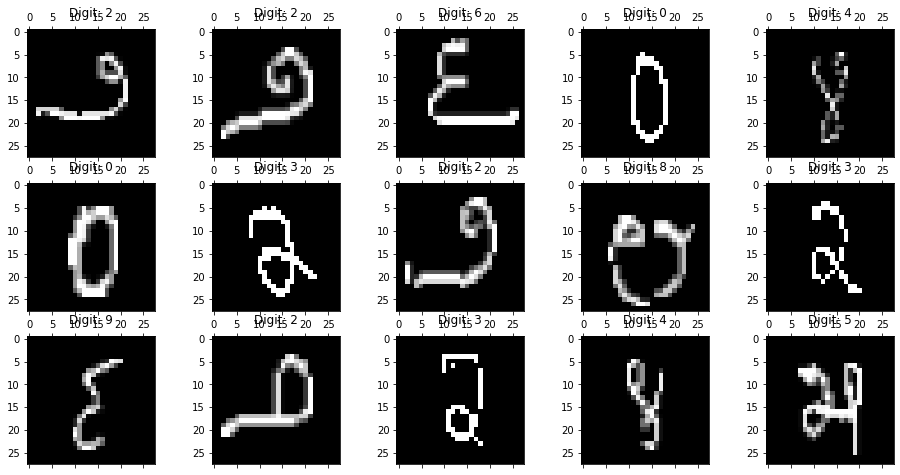

In [7]:
# 데이터 형태 시각화

rndperm = np.random.permutation(X_train.shape[0])
feat_cols = train.drop('label', axis=1).columns

# Plot the graph
plt.gray()
fig = plt.figure(figsize=(16,8))
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(train.loc[rndperm[i],'label'])) )
    ax.matshow(train.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [7]:
# scaling - 계산 과정 상 소수점의 형태로 나오기 때문에 소수점 윗 부분까지 계산하여 속도를 감소시킬 필요가 없기 때문!

X_train, X_test = X_train/255.0, X_test/255.0

print('maximum value after scaling:', X_train.max(),
      '\nminimum value after scaling:' ,X_train.min())

maximum value after scaling: 1.0 
minimum value after scaling: 0.0


In [8]:
# train test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


### Modeling
#### 1. optimizer = rmsprop로 변경

In [12]:
#Sequential = model object - 순차적으로 레이어 층을 더해주는 모델(순차모델)
#Dense 레이어 : 입출력을 모두 연결 + 입출력을 각각 연결해주는 가중치 포함
#Dense 레이어에서 마지막 층이 아니고서야 활성화함수로 relu를 사용하는 편 (relu가 역전파를 통해 좋은 성능이 나오기 때문)

model = tf.keras.models.Sequential([  
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(10, activation='softmax') #마지막 레이어의 노드 개수는 출력 데이터 y(lable)과 동일한 개수로 지정, 출력층
])

In [13]:
# loss : 손실함수 - 얼마나 입/출력 데이터가 일치하는 지 평가해주는 함수
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='rmsprop',
              metrics=["accuracy"])

In [16]:
model.fit(X_train, y_train, epochs=5, batch_size=100)
model.evaluate(X_val, y_val)

Epoch 1/5
336/336 [==============================] - 4s 11ms/step - loss: 0.3523 - accuracy: 0.8928
Epoch 2/5
336/336 [==============================] - 4s 11ms/step - loss: 0.0717 - accuracy: 0.9788
Epoch 3/5
336/336 [==============================] - 4s 12ms/step - loss: 0.0473 - accuracy: 0.9848
Epoch 4/5
336/336 [==============================] - 4s 13ms/step - loss: 0.0345 - accuracy: 0.9893
Epoch 5/5
263/263 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9854


[0.06912656873464584, 0.9853571653366089]

In [17]:
predictions = model.predict_classes(X_test)

sample_submission['Category'] = pd.Series(predictions)
sample_submission.head()

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [18]:
sample_submission.to_csv("submission.csv",index=False)

LeaderBoard Score : 0.98411

#### 2. Dropout 대신 Batch Normalization 사용

In [19]:
#BatchNormalization() : 배치정규화 - 은닉층의 활성화 함수 전이나 후에 추가가능

model = tf.keras.models.Sequential([  
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer='rmsprop',
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=5, batch_size=100)
model.evaluate(X_val, y_val)

Epoch 1/5
336/336 [==============================] - 5s 11ms/step - loss: 0.2481 - accuracy: 0.9230
Epoch 2/5
336/336 [==============================] - 4s 11ms/step - loss: 0.0444 - accuracy: 0.9863
Epoch 3/5
336/336 [==============================] - 4s 12ms/step - loss: 0.0252 - accuracy: 0.9918
Epoch 4/5
336/336 [==============================] - 5s 14ms/step - loss: 0.0135 - accuracy: 0.9962
Epoch 5/5
263/263 [==============================] - 1s 3ms/step - loss: 0.0758 - accuracy: 0.9844


[0.0757758766412735, 0.9844047427177429]

In [20]:
predictions = model.predict_classes(X_test)

sample_submission['Category'] = pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [21]:
sample_submission.to_csv("submission.csv",index=False)

LeaderBoard Score : 0.98455
소폭 상승했다!

#### 3. 은닉층의 활성화함수로 sigmoid 사용

In [22]:
#BatchNormalization() : 배치정규화 - 은닉층의 활성화 함수 전이나 후에 추가가능

model = tf.keras.models.Sequential([  
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer='rmsprop',
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=5, batch_size=100)
model.evaluate(X_val, y_val)

Epoch 1/5
336/336 [==============================] - 5s 12ms/step - loss: 0.2869 - accuracy: 0.9156
Epoch 2/5
336/336 [==============================] - 3s 10ms/step - loss: 0.0569 - accuracy: 0.9817
Epoch 3/5
336/336 [==============================] - 4s 11ms/step - loss: 0.0291 - accuracy: 0.9903
Epoch 4/5
336/336 [==============================] - 4s 11ms/step - loss: 0.0212 - accuracy: 0.9936
Epoch 5/5
263/263 [==============================] - 1s 2ms/step - loss: 0.0722 - accuracy: 0.9861


[0.07219624519348145, 0.9860714077949524]

In [23]:
predictions = model.predict_classes(X_test)

sample_submission['Category'] = pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [24]:
sample_submission.to_csv("submission.csv",index=False)

LeaderBoard Score : 0.98483 소폭 상승했다!

#### 4. 은닉층 추가

In [30]:
#BatchNormalization() : 배치정규화 - 은닉층의 활성화 함수 전이나 후에 추가가능

model = tf.keras.models.Sequential([  
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(512, activation='relu'),    
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(384, activation='sigmoid'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer='rmsprop',
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=5, batch_size=100)
model.evaluate(X_val, y_val)

Epoch 1/5
336/336 [==============================] - 7s 16ms/step - loss: 0.2825 - accuracy: 0.9172
Epoch 2/5
336/336 [==============================] - 5s 14ms/step - loss: 0.0606 - accuracy: 0.9813
Epoch 3/5
336/336 [==============================] - 5s 14ms/step - loss: 0.0348 - accuracy: 0.9900
Epoch 4/5
336/336 [==============================] - 5s 15ms/step - loss: 0.0234 - accuracy: 0.9933
Epoch 5/5
263/263 [==============================] - 1s 3ms/step - loss: 0.0809 - accuracy: 0.9812


[0.0809178426861763, 0.9811905026435852]

In [32]:
predictions = model.predict_classes(X_test)

sample_submission['Category'] = pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [33]:
sample_submission.to_csv("submission.csv",index=False)

LeaderBoard Score : 0.98322로 감소했다.

#### 5. epoch, batch_size 증가

In [34]:
#BatchNormalization() : 배치정규화 - 은닉층의 활성화 함수 전이나 후에 추가가능

model = tf.keras.models.Sequential([  
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer='rmsprop',
              metrics=["accuracy"])

# epochs : 학습시키는 크기 - 100묶음씩 10번 학습
# batch_size : 학습시킬 때 묶음, 샘플 수

model.fit(X_train, y_train, epochs=20, batch_size=200)
model.evaluate(X_val, y_val)

Epoch 1/20
168/168 [==============================] - 3s 16ms/step - loss: 0.2996 - accuracy: 0.9101
Epoch 2/20
168/168 [==============================] - 3s 15ms/step - loss: 0.0536 - accuracy: 0.9835
Epoch 3/20
168/168 [==============================] - 3s 16ms/step - loss: 0.0285 - accuracy: 0.9911
Epoch 4/20
168/168 [==============================] - 3s 17ms/step - loss: 0.0148 - accuracy: 0.9950
Epoch 5/20
168/168 [==============================] - 3s 16ms/step - loss: 0.0101 - accuracy: 0.9972
Epoch 6/20
168/168 [==============================] - 3s 16ms/step - loss: 0.0058 - accuracy: 0.9983
Epoch 7/20
168/168 [==============================] - 3s 16ms/step - loss: 0.0057 - accuracy: 0.9983
Epoch 8/20
168/168 [==============================] - 3s 17ms/step - loss: 0.0045 - accuracy: 0.9989
Epoch 9/20
168/168 [==============================] - 3s 16ms/step - loss: 0.0025 - accuracy: 0.9991
Epoch 10/20
168/168 [==============================] - 3s 17ms/step - loss: 0.0042 - accura

[0.11166539788246155, 0.9847618937492371]

In [35]:
predictions = model.predict_classes(X_test)

sample_submission['Category'] = pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [36]:
sample_submission.to_csv("submission.csv",index=False)

LeaderBoard Score : 0.98383로 감소했다.

#### 6. regularization L2

In [39]:
from tensorflow.keras.regularizers import l2

#BatchNormalization() : 배치정규화 - 은닉층의 활성화 함수 전이나 후에 추가가능

model = tf.keras.models.Sequential([  
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='sigmoid', kernel_regularizer=l2(0.01)),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer='rmsprop',
              metrics=["accuracy"])

# epochs : 학습시키는 크기 - 100묶음씩 10번 학습
# batch_size : 학습시킬 때 묶음, 샘플 수

model.fit(X_train, y_train, epochs=5, batch_size=100)
model.evaluate(X_val, y_val)

Epoch 1/5
336/336 [==============================] - 5s 12ms/step - loss: 2.1391 - accuracy: 0.9136 0s - loss: 2.2219 - accura
Epoch 2/5
336/336 [==============================] - 4s 12ms/step - loss: 0.1294 - accuracy: 0.9752
Epoch 3/5
336/336 [==============================] - 4s 12ms/step - loss: 0.0978 - accuracy: 0.9825
Epoch 4/5
336/336 [==============================] - 4s 12ms/step - loss: 0.0767 - accuracy: 0.9870
Epoch 5/5
263/263 [==============================] - 1s 3ms/step - loss: 0.0949 - accuracy: 0.9807


[0.09485787898302078, 0.9807142615318298]

In [40]:
predictions = model.predict_classes(X_test)

sample_submission['Category'] = pd.Series(predictions)
sample_submission.head()

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [41]:
sample_submission.to_csv("submission.csv",index=False)

LeaderBoard Score : 0.98200으로 감소했다.

#### 7. 은닉층/epochs 증가 + optimizer 변경

In [27]:
#BatchNormalization() : 배치정규화 - 은닉층의 활성화 함수 전이나 후에 추가가능

model = tf.keras.models.Sequential([  
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(256, activation='relu'),    
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50, batch_size=100)
model.evaluate(X_val, y_val)

Epoch 1/50
336/336 [==============================] - 3s 7ms/step - loss: 0.3865 - accuracy: 0.8872
Epoch 2/50
336/336 [==============================] - 2s 7ms/step - loss: 0.0483 - accuracy: 0.9861
Epoch 3/50
336/336 [==============================] - 2s 7ms/step - loss: 0.0283 - accuracy: 0.9917
Epoch 4/50
336/336 [==============================] - 2s 7ms/step - loss: 0.0203 - accuracy: 0.9933
Epoch 5/50
336/336 [==============================] - 2s 7ms/step - loss: 0.0183 - accuracy: 0.9940
Epoch 6/50
336/336 [==============================] - 2s 6ms/step - loss: 0.0186 - accuracy: 0.9939
Epoch 7/50
336/336 [==============================] - 3s 8ms/step - loss: 0.0153 - accuracy: 0.9955
Epoch 8/50
336/336 [==============================] - 2s 7ms/step - loss: 0.0120 - accuracy: 0.9965: 1s -
Epoch 9/50
336/336 [==============================] - 2s 7ms/step - loss: 0.0145 - accuracy: 0.9955
Epoch 10/50
336/336 [==============================] - 2s 6ms/step - loss: 0.0108 - accuracy: 

[0.0676751658320427, 0.9876190423965454]

In [28]:
predictions = model.predict_classes(X_test)

sample_submission['Category'] = pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [29]:
sample_submission.to_csv("submission.csv",index=False)

LeaderBoard Score : 0.98611로 증가했다.

#### 8. kernel_initializer='he_normal' 추가

In [30]:
#BatchNormalization() : 배치정규화 - 은닉층의 활성화 함수 전이나 후에 추가가능

model = tf.keras.models.Sequential([  
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(256, activation='relu'),    
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer='rmsprop',
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50, batch_size=100)
model.evaluate(X_val, y_val)

Epoch 1/50
336/336 [==============================] - 5s 10ms/step - loss: 0.3003 - accuracy: 0.9125
Epoch 2/50
336/336 [==============================] - 3s 10ms/step - loss: 0.0539 - accuracy: 0.9830
Epoch 3/50
336/336 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.98 - 3s 10ms/step - loss: 0.0316 - accuracy: 0.9899
Epoch 4/50
336/336 [==============================] - 3s 10ms/step - loss: 0.0221 - accuracy: 0.9926
Epoch 5/50
336/336 [==============================] - 3s 9ms/step - loss: 0.0135 - accuracy: 0.9956
Epoch 6/50
336/336 [==============================] - 3s 9ms/step - loss: 0.0125 - accuracy: 0.9964
Epoch 7/50
336/336 [==============================] - 3s 9ms/step - loss: 0.0099 - accuracy: 0.9971
Epoch 8/50
336/336 [==============================] - 3s 9ms/step - loss: 0.0082 - accuracy: 0.9980
Epoch 9/50
336/336 [==============================] - 3s 9ms/step - loss: 0.0089 - accuracy: 0.9970
Epoch 10/50
336/336 [==============================] -

[0.10306155681610107, 0.9860714077949524]

In [31]:
predictions = model.predict_classes(X_test)

sample_submission['Category'] = pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [32]:
sample_submission.to_csv("submission.csv",index=False)

LeaderBoard Score : 0.98666로 증가했다.

### 9. 최종모델

In [67]:
#BatchNormalization() : 배치정규화 - 은닉층의 활성화 함수 전이나 후에 추가가능

model = tf.keras.models.Sequential([  
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'),    
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(), #활성화 함수 이후 추가
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50, batch_size=100)
model.evaluate(X_val, y_val)

Epoch 1/50
336/336 [==============================] - 4s 8ms/step - loss: 0.7694 - accuracy: 0.7959
Epoch 2/50
336/336 [==============================] - 3s 8ms/step - loss: 0.0878 - accuracy: 0.9788
Epoch 3/50
336/336 [==============================] - 3s 8ms/step - loss: 0.0562 - accuracy: 0.9856
Epoch 4/50
336/336 [==============================] - 3s 8ms/step - loss: 0.0401 - accuracy: 0.9893
Epoch 5/50
336/336 [==============================] - 3s 8ms/step - loss: 0.0294 - accuracy: 0.9914: 0s - loss: 0.0291 - accu
Epoch 6/50
336/336 [==============================] - 3s 8ms/step - loss: 0.0303 - accuracy: 0.9914
Epoch 7/50
336/336 [==============================] - 3s 8ms/step - loss: 0.0251 - accuracy: 0.9927
Epoch 8/50
336/336 [==============================] - 3s 8ms/step - loss: 0.0183 - accuracy: 0.9946
Epoch 9/50
336/336 [==============================] - 3s 8ms/step - loss: 0.0166 - accuracy: 0.9948
Epoch 10/50
336/336 [==============================] - 3s 8ms/step - loss:

[0.07265730202198029, 0.9867857098579407]

In [71]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_137 (Bat (None, 512)               2048      
_________________________________________________________________
dense_170 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_138 (Bat (None, 256)               1024      
_________________________________________________________________
dense_171 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_139 (Bat (None, 128)               512       
_________________________________________________________________
dense_172 (Dense)            (None, 64)              

In [68]:
predictions = model.predict_classes(X_test)

sample_submission['Category'] = pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [72]:
sample_submission.to_csv("submission.csv",index=False)

LeaderBoard Score : 0.98677로 증가했다.